___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

## Import  libraries & data

In [19]:
!pip3 install tensorflow
!pip3 install keras



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [20]:
!pip3 install scikeras



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [21]:
!pip3 install optuna



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, classification_report, ConfusionMatrixDisplay,\
RocCurveDisplay, roc_auc_score,roc_curve
from sklearn.utils.class_weight import compute_class_weight
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

import pickle
import warnings
import os
import optuna

warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
sns.set_style('whitegrid')

In [23]:
df = pd.read_csv('Churn_Modelling.csv')
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


## Exploratory Data Analysis and Visualization

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [25]:
df.shape

(10000, 14)

In [26]:
df.isnull().sum().any()

False

In [27]:
df.duplicated().sum()

0

In [28]:
df.describe().T



,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [29]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

0    7963
1    2037
Name: Exited, dtype: int64


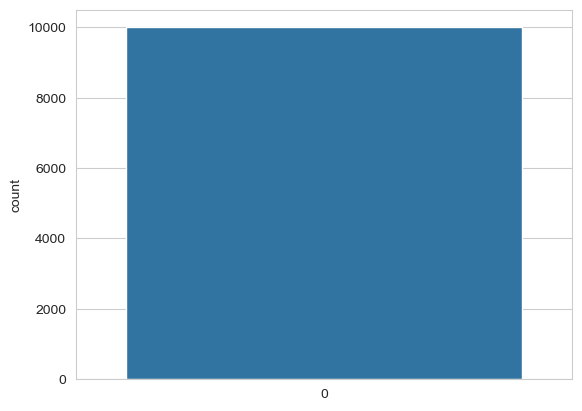

In [30]:
print(df.Exited.value_counts())
sns.countplot(df["Exited"]);

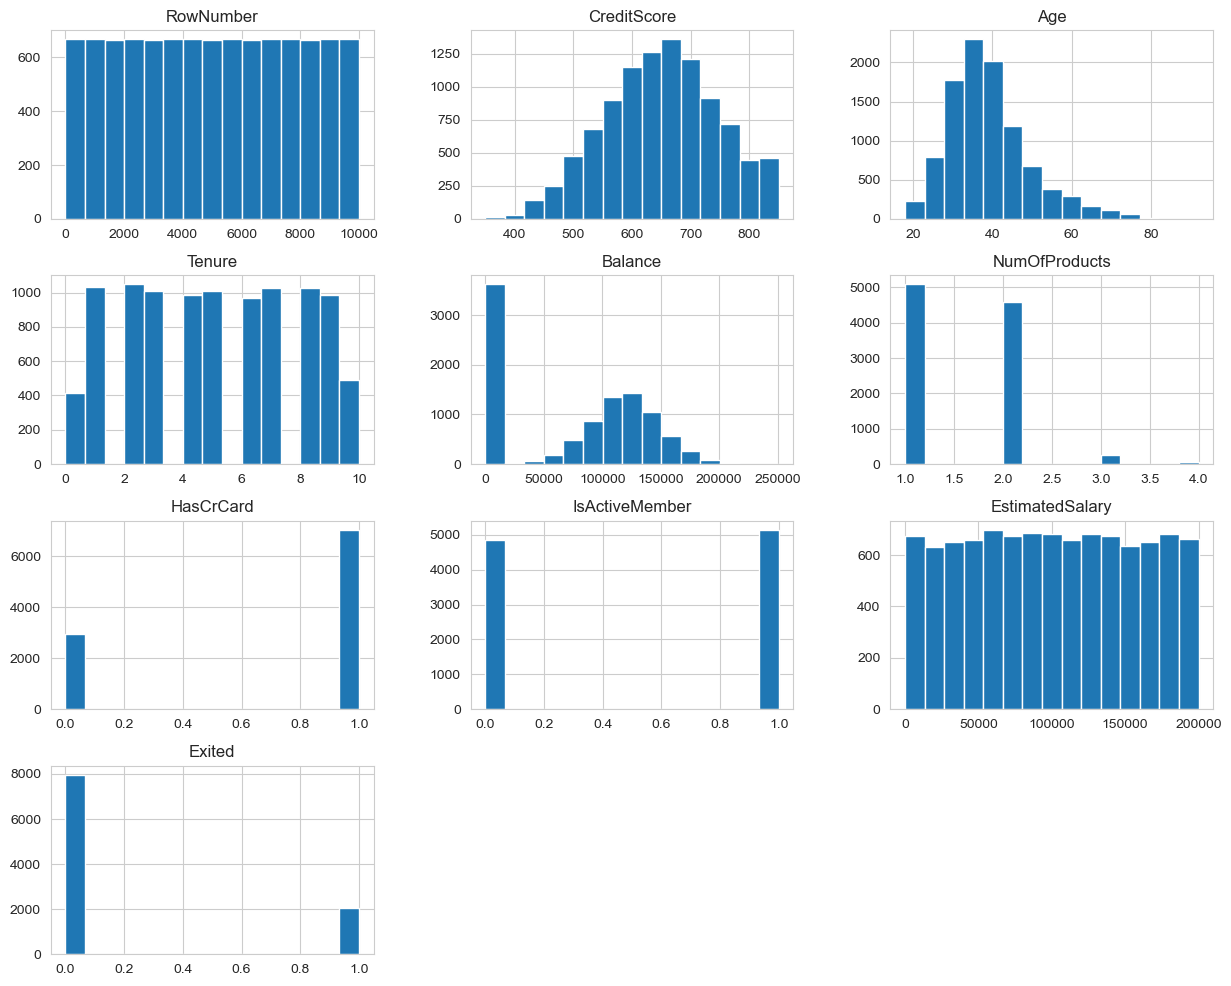

In [31]:
df.hist(figsize=(15, 12), bins=15);


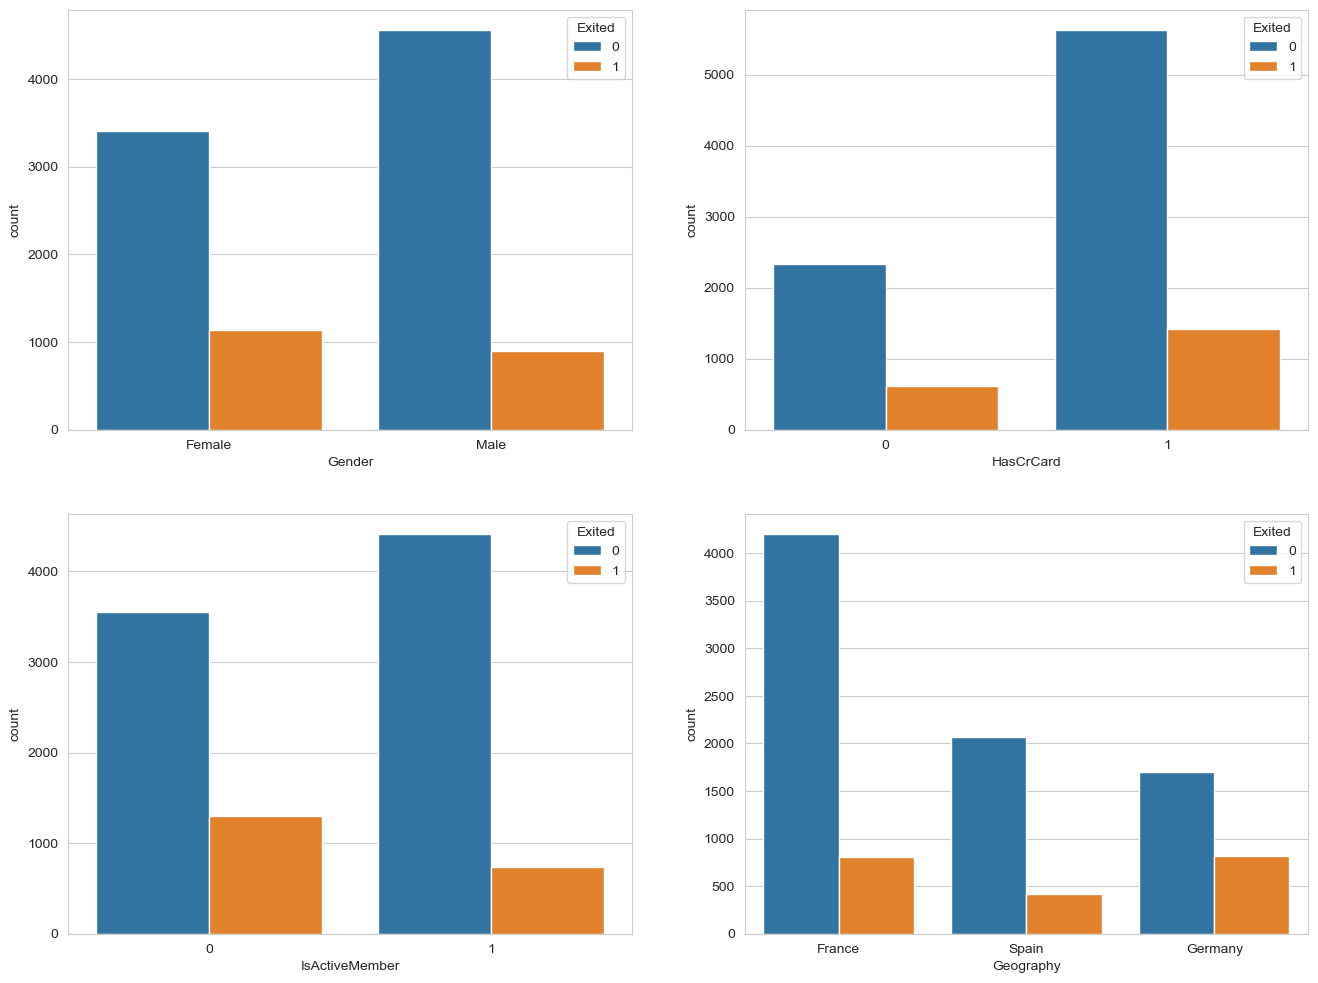

In [32]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=df, x=i, hue="Exited")

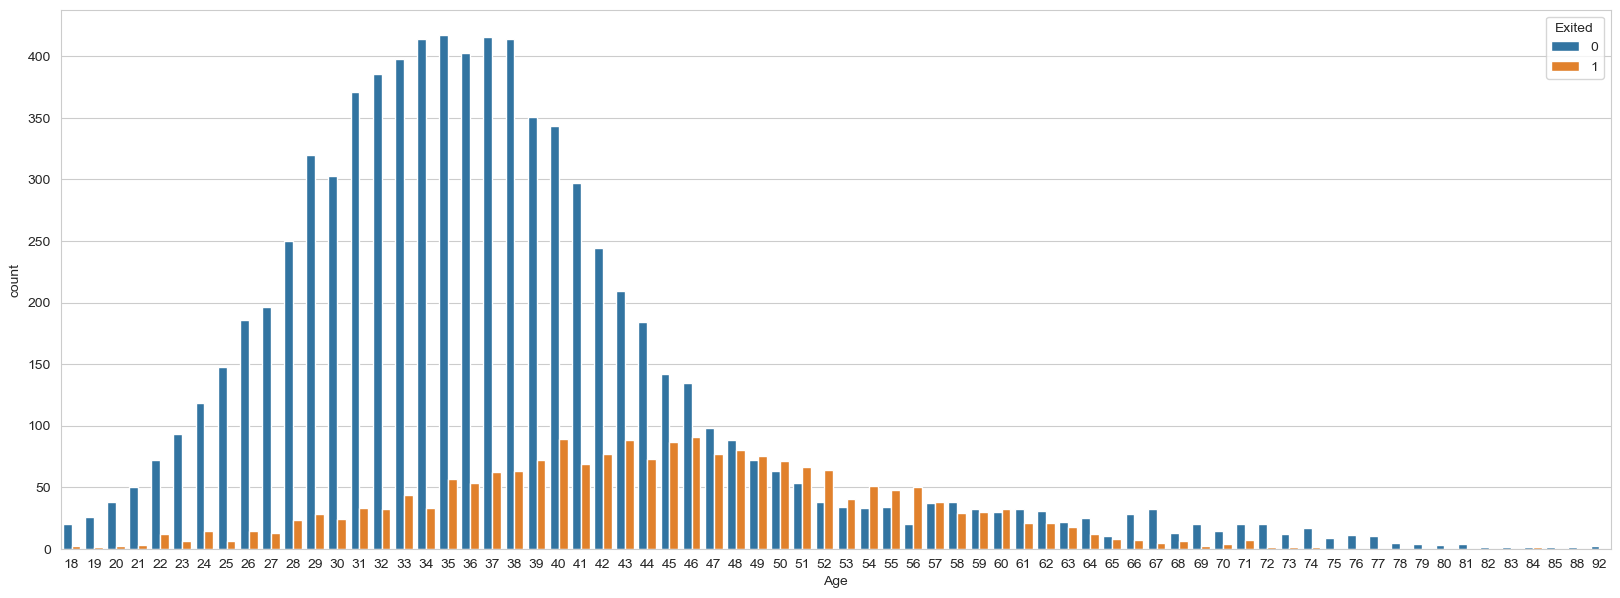

In [33]:
plt.figure(figsize=(20, 7))
sns.countplot(x='Age', hue='Exited', data=df)
plt.show()

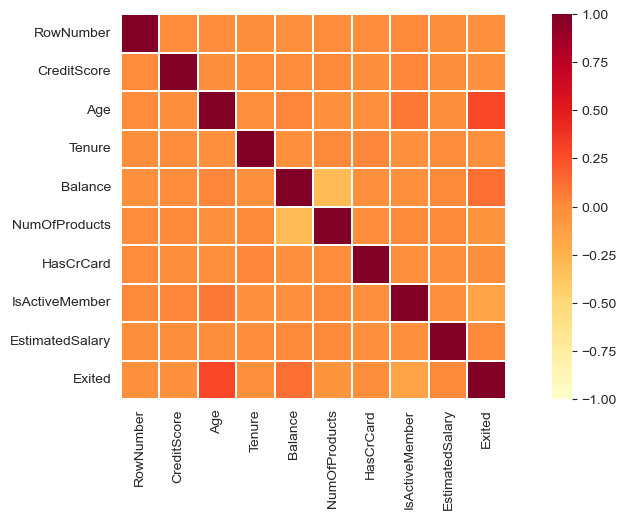

In [34]:
plt.figure(figsize=(12, 5))
sns.heatmap(df.corr(numeric_only=True), 
            vmin=-1,
            vmax= 1,
            cmap= 'YlOrRd', 
            linewidths=.12, 
            linecolor='white',
            fmt='.2g',
            square=True);

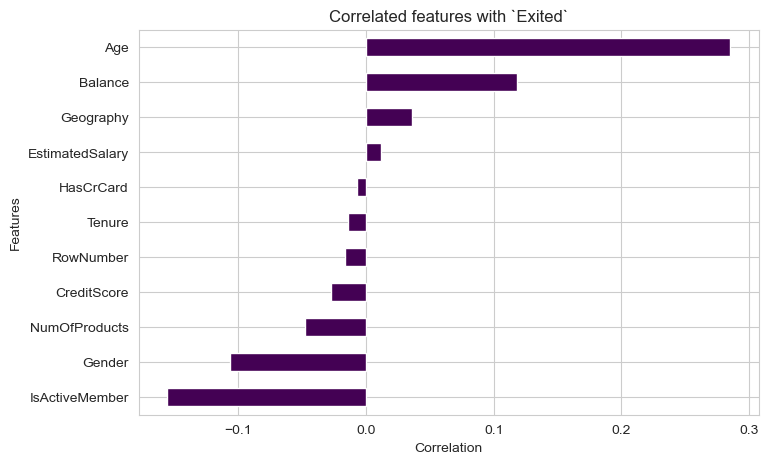

In [35]:

# Encode categorical variables to numeric values
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Calculate correlations with 'Exited' after converting categorical variables to numeric
correlation_data = df.corr()['Exited'][:-1].sort_values()

plt.figure(figsize=(8, 5))
correlation_data.plot(kind='barh', colormap='viridis')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('Correlated features with `Exited`')
plt.show()


In [36]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## Preprocessing of Data

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [38]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=seed)


In [39]:
scaler = MinMaxScaler()


In [40]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

### without class_weigth

In [41]:
X_train.shape

(9000, 11)

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the Sequential model
model = Sequential()

# Set the random seed (if 'seed' is defined)
seed = 42  # You should define 'seed' if it's not already defined

tf.random.set_seed(seed)

# Add layers to the model
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Define the optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])


In [43]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stop = EarlyStopping(
    monitor="val_loss",  # Monitor validation loss
    mode="auto",         # Automatically determine whether to minimize or maximize the monitored metric
    verbose=1,           # Print messages when early stopping is triggered
    patience=15          # Number of epochs with no improvement before stopping
)
#The patience is often set somewhere between 10 and 100 (10 or 20 is more common), 
#but it really depends on your dataset and network.

In [44]:
history = model.fit(
    X_train,            # Preprocessed training data
    y_train,            # Training labels
    validation_split=0.1,  # 10% of the training data used for validation
    batch_size=128,     # Batch size for training
    epochs=200,         # Maximum number of epochs
    verbose=1,          # Verbosity level
    callbacks=[early_stop]  # Include the early stopping callback
)


Epoch 1/200


2023-10-30 22:50:54.528454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2023-10-30 22:50:54.557344: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


64/64 [==============================] - 3s 14ms/step - loss: 0.5829 - recall: 0.1005 - val_loss: 0.5149 - val_recall: 0.0000e+00
Epoch 2/200
64/64 [==============================] - 0s 6ms/step - loss: 0.5140 - recall: 0.0000e+00 - val_loss: 0.5019 - val_recall: 0.0000e+00
Epoch 3/200
64/64 [==============================] - 0s 6ms/step - loss: 0.5051 - recall: 0.0000e+00 - val_loss: 0.4917 - val_recall: 0.0000e+00
Epoch 4/200
64/64 [==============================] - 0s 6ms/step - loss: 0.4934 - recall: 0.0000e+00 - val_loss: 0.4776 - val_recall: 0.0000e+00
Epoch 5/200
64/64 [==============================] - 0s 6ms/step - loss: 0.4828 - recall: 6.0533e-04 - val_loss: 0.4668 - val_recall: 0.0000e+00
Epoch 6/200
64/64 [==============================] - 0s 6ms/step - loss: 0.4741 - recall: 0.0030 - val_loss: 0.4583 - val_recall: 0.0166
Epoch 7/200
64/64 [==============================] - 0s 6ms/step - loss: 0.4675 - recall: 0.0266 - val_loss: 0.4503 - val_recall: 0.0552
Epoch 8/200
64/6

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                192       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337 (1.32 KB)
Trainable params: 337 (1.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.582885,0.100484,0.514939,0.0
1,0.513990,0.000000,0.501854,0.0
2,0.505066,0.000000,0.491723,0.0
3,0.493448,0.000000,0.477641,0.0
4,0.482817,0.000605,0.466816,0.0


<Axes: >

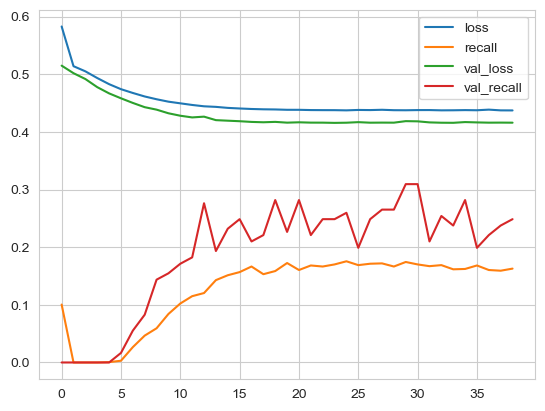

In [47]:
loss_df.plot()

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 4ms/step
[[773  23]
 [174  30]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       796
           1       0.57      0.15      0.23       204

    accuracy                           0.80      1000
   macro avg       0.69      0.56      0.56      1000
weighted avg       0.77      0.80      0.75      1000



### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

32/32 [==============================] - 0s 1ms/step


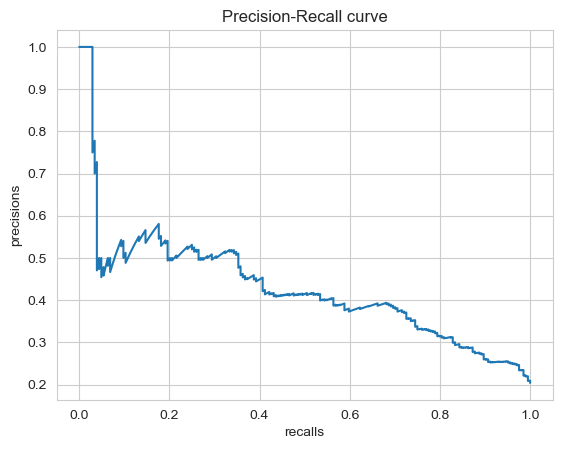

In [49]:
from sklearn.metrics import precision_recall_curve
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()
# roc curve, sınıflandırma performansını gösterir

In [50]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test, y_pred_proba)

0.4306051914766783

### with class_weigth

In [51]:
model = Sequential()

tf.random.set_seed(seed)

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [52]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [53]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/200
64/64 [==============================] - 1s 10ms/step - loss: 0.7462 - recall: 0.2851 - val_loss: 0.6704 - val_recall: 0.2210
Epoch 2/200
64/64 [==============================] - 0s 7ms/step - loss: 0.7035 - recall: 0.3275 - val_loss: 0.6733 - val_recall: 0.4309
Epoch 3/200
64/64 [==============================] - 0s 6ms/step - loss: 0.6762 - recall: 0.5327 - val_loss: 0.6333 - val_recall: 0.4862
Epoch 4/200
64/64 [==============================] - 0s 6ms/step - loss: 0.6575 - recall: 0.6211 - val_loss: 0.6112 - val_recall: 0.5470
Epoch 5/200
64/64 [==============================] - 0s 6ms/step - loss: 0.6454 - recall: 0.6338 - val_loss: 0.6418 - val_recall: 0.6740
Epoch 6/200
64/64 [==============================] - 0s 6ms/step - loss: 0.6354 - recall: 0.6580 - val_loss: 0.5976 - val_recall: 0.6188
Epoch 7/200
64/64 [==============================] - 0s 6ms/step - loss: 0.6281 - recall: 0.6598 - val_loss: 0.6278 - val_recall: 0.6851
Epoch 8/200
64/64 [=====================

<Axes: >

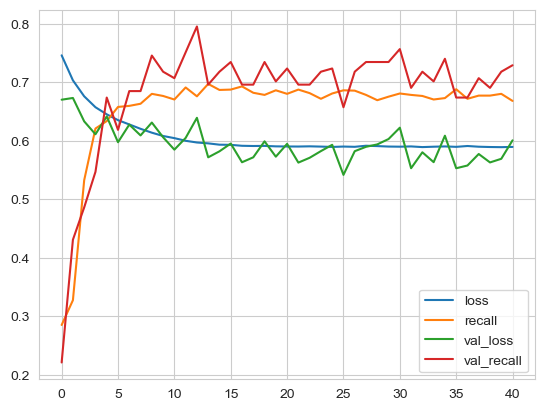

In [54]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [55]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[524 272]
 [ 54 150]]
              precision    recall  f1-score   support

           0       0.91      0.66      0.76       796
           1       0.36      0.74      0.48       204

    accuracy                           0.67      1000
   macro avg       0.63      0.70      0.62      1000
weighted avg       0.79      0.67      0.70      1000



### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

32/32 [==============================] - 0s 1ms/step


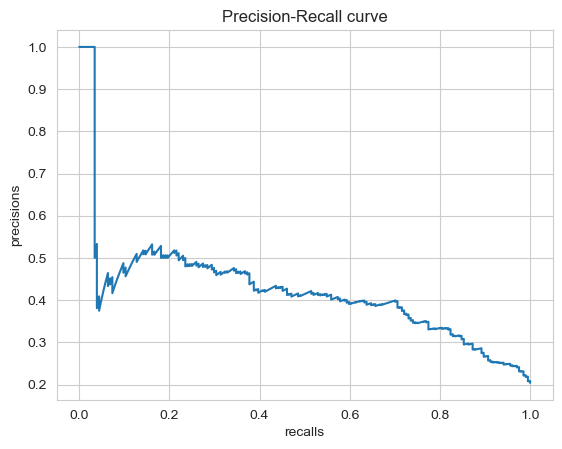

In [56]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()
# roc curve, sınıflandırma performansını gösterir

In [57]:
average_precision_score(y_test, y_pred_proba)   #0.692983743350624

0.4233596264399594

In [58]:
from tensorflow.keras.optimizers import Adadelta, RMSprop, Nadam, Adam, SGD
def build_classifier(optimizer,learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units=16, activation='relu'))
    classifier.add(Dense(units=8, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer(learn_rate),
                       loss='binary_crossentropy',
                       metrics=['Recall'])
    return classifier

In [59]:
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [60]:
from sklearn.model_selection import GridSearchCV

tf.random.set_seed(seed)

classifier = KerasClassifier(build_fn=build_classifier, epochs=200)
parameters = {
    'batch_size': [128, 256],
    'optimizer': [Adam, RMSprop, Nadam, Adadelta, SGD],
    'learn_rate': [0.001, 0.003, 0.005]
}
grid_model = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring='recall',
                          cv=5,
                          n_jobs=-1,
                          verbose=0)
#grid_model.fit(X_train,y_train, class_weight=class_weights)

In [61]:
# Create a custom wrapper class
class CustomKerasClassifier(KerasClassifier):
    def __init__(self, build_fn=None, learn_rate=0.001, **kwargs):
        self.learn_rate = learn_rate
        super(CustomKerasClassifier, self).__init__(build_fn=build_fn, **kwargs)
    
    def build_fn(self):
        return build_classifier(learn_rate=self.learn_rate)

# Create a CustomKerasClassifier instance
classifier = CustomKerasClassifier(epochs=200, batch_size=128)

# Define the parameters grid for grid search
parameters = {
    'learn_rate': [0.001, 0.003, 0.005],
    'batch_size': [128, 256]
}

In [62]:
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [63]:


classifier = KerasClassifier(build_fn=build_classifier, epochs=200)
parameters = {
    'batch_size': [128, 256],
    'optimizer': [Adam, RMSprop, Nadam, Adadelta, SGD],
    'learn_rate': [0.001, 0.003, 0.005]
}
grid_model = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring='recall',
                          cv=5,
                          n_jobs=-1,
                          verbose=0)

In [64]:
#grid_model.fit(X_train, y_train, class_weight=class_weights)

### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for grid_model

In [65]:
#y_pred_proba = grid_model.predict(X_test)
#precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
#plt.plot(recalls, precisions, label='ANN')
#plt.xlabel('recalls')
#plt.ylabel('precisions')
#plt.title('Precision-Recall curve')
#plt.show()

In [66]:
average_precision_score(y_test, y_pred_proba)

0.4233596264399594

## Final Model and Model Deployment

In [67]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [68]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.003)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop],
          batch_size=256,
          epochs=200,
          verbose=1,
          class_weight=class_weights)    
# {'batch_size': 256,'learn_rate': 0.003,'optimizer': keras.optimizer_v2.adam.Adam}
# pay attention!! validation data 

Epoch 1/200
36/36 [==============================] - 1s 13ms/step - loss: 0.6635 - recall: 0.5734 - val_loss: 0.6191 - val_recall: 0.6078
Epoch 2/200
36/36 [==============================] - 0s 7ms/step - loss: 0.6345 - recall: 0.6498 - val_loss: 0.6619 - val_recall: 0.7647
Epoch 3/200
36/36 [==============================] - 0s 7ms/step - loss: 0.6204 - recall: 0.6688 - val_loss: 0.6365 - val_recall: 0.7402
Epoch 4/200
36/36 [==============================] - 0s 8ms/step - loss: 0.6092 - recall: 0.6787 - val_loss: 0.6255 - val_recall: 0.7304
Epoch 5/200
36/36 [==============================] - 0s 7ms/step - loss: 0.5991 - recall: 0.6890 - val_loss: 0.5703 - val_recall: 0.6471
Epoch 6/200
36/36 [==============================] - 0s 7ms/step - loss: 0.5930 - recall: 0.6765 - val_loss: 0.6634 - val_recall: 0.7941
Epoch 7/200
36/36 [==============================] - 0s 7ms/step - loss: 0.5916 - recall: 0.6901 - val_loss: 0.5758 - val_recall: 0.6863
Epoch 8/200
36/36 [=====================

<Axes: >

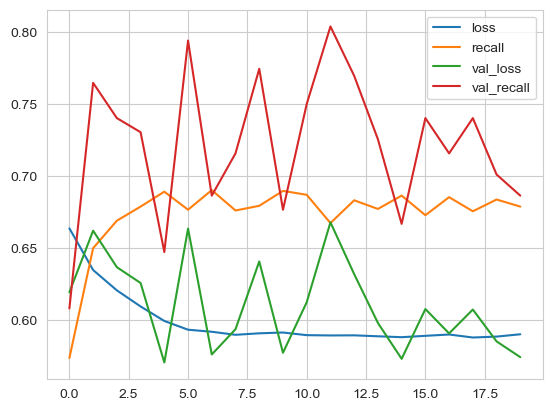

In [69]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [70]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.5739368200302124
recall :  0.686274528503418


In [71]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[578 218]
 [ 64 140]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.80       796
           1       0.39      0.69      0.50       204

    accuracy                           0.72      1000
   macro avg       0.65      0.71      0.65      1000
weighted avg       0.80      0.72      0.74      1000



In [72]:
model.save('model_churn.h5')

### Prediction

In [73]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

RowNumber               1.00
CreditScore           619.00
Geography               0.00
Gender                  0.00
Age                    42.00
Tenure                  2.00
Balance                 0.00
NumOfProducts           1.00
HasCrCard               1.00
IsActiveMember          1.00
EstimatedSalary    101348.88
Name: 0, dtype: float64

In [74]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 11))
single_customer

array([[0.        , 0.538     , 0.        , 0.        , 0.32432432,
        0.2       , 0.        , 0.        , 1.        , 1.        ,
        0.50673489]])

In [75]:
y_pred =(model.predict(single_customer) > 0.5).astype("int32")
y_pred

1/1 [==============================] - 0s 184ms/step


array([[0]], dtype=int32)

In [76]:
df["Exited"].iloc[0]

1

## Comparison with ML

### Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
log_model=LogisticRegression(class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[548 248]
 [ 57 147]]
              precision    recall  f1-score   support

           0       0.91      0.69      0.78       796
           1       0.37      0.72      0.49       204

    accuracy                           0.69      1000
   macro avg       0.64      0.70      0.64      1000
weighted avg       0.80      0.69      0.72      1000



### Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier


In [80]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[770  26]
 [127  77]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       796
           1       0.75      0.38      0.50       204

    accuracy                           0.85      1000
   macro avg       0.80      0.67      0.71      1000
weighted avg       0.84      0.85      0.83      1000



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___